Makine öğrenmesi uygulamalarında temel amaç eldeki veriden örüntüler öğrenmek, bu örüntüleri kullanarak değer oluşturmaktır. Örnek olarak müşterilerin özelliklerine bakarak terk edecek ya da kampanyanızdan yararlanacak müşterileri tahmin etmeye çalışabilirsiniz. Bir tavsiye sistemi kurarak müşterilerinize ilgilenecekleri ürünleri önermeye çalışabilirsiniz. Ya da bir bölgedeki evlerin özelliklerine ve fiyatlarına bakarak ilgilendiğiniz evin fiyatının düşük ya da yüksek olup olmadığını yorumlamak isteyebilirsiniz. Bulacağınız örüntüler gerçek hakkında size ipucu verecek modellere denk geliyor. Gerçeği tam olarak tahmin etmeniz imkansız olsa da model kurarken kaçınmanız gerkeen iki hata tipi var. Bu Veri Defteri'nde *Overfitting* (Aşırı uyum) ve *Underfitting* (Eksik uyum) kavramlarından bahsedeceğiz.

* *Underfitting*: Modelin gözlemlerdeki örüntüyü eksik yakalaması durumuna denir. Örnek olarak karekök fonksiyonunu ya da ikinci dereceden bir denklemi bir doğru ile yakınsamayı gösterebiliriz.
* *Overfitting*: Modelin örüntüler yerine gözlemleri öğrenmeye başlamasıdır. Bu durumda öğrenme için kullandığınız veri setini öğrenirsiniz. Ancak bu şekilde oluşturacağınız modeller yeni ve daha önceden görmediğiniz gözlemlerle karşılaştığında başarılı bir tahmin yapma olasılığınızı azaltır. 

Bu kavramlara bir kaç örnekle bakmayı deneyelim. İlk olarak kullanacağımız paketleri yükleyelim.

In [1]:
%matplotlib inline
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt

#Veri setini bölmek için
from sklearn.model_selection import train_test_split

#Kullanacağımız doğrusal bağlanım (linear regression) ve gradient boosting yöntemleri
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier

#Yapay sınıflandırma verisi oluşturmak için gerekli bir fonksiyon
from sklearn.datasets import make_classification

#Sonuçları değerlendirmek için gerekli fonksiyonlar
from sklearn.metrics import mean_squared_error, accuracy_score

#Veriyi istediğimiz dereceden değişkenlerden oluşturmak için PolynomialFeatures kullanacağız.
from sklearn.preprocessing import PolynomialFeatures

Kavramları göstermek için yapay bir veri seti oluşturalım. Çıktı ile girdi arasında doğrusal bir ilişki kurduğum için doğrusal bağlanım yöntemiyle bu veri setindeki örüntüyü öğrenmeye çalışacağız. İlk olarak 75 gözlemden oluşan bir yapay veri seti oluşturalım. `train_test_split()` fonksiyonu veriyi öğrenme (training) ve sınama (testing) için iki kümeye ayıracak.

Kuracağımız ilişki $y = 2.5 x + \epsilon$ şeklinde olarak. Burada $\epsilon$ rassal olarak eklediğimiz bir gürültüye (noise) denk geliyor.

In [2]:
num_obs = 75
#Random seed her bilgisayarda aynı sonucu elde etmek için kullanılan bir fonksiyon. 
#Ancak versiyon değişiklikleri gibi nedenlerle farklı sonuçlar elde edebilirsiniz.

np.random.seed(1)
X = np.random.rand(num_obs)*10
y = 2.5 * X + np.random.randn(num_obs)*2

#Veriyi %80 öğrenme ve %20 sınama şeklinde ikiye ayırıyoruz.
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 0)

C:\Users\byuceoglu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Örüntüyü görmek için bir serpme (`scatter`) grafiği kullanalım. 

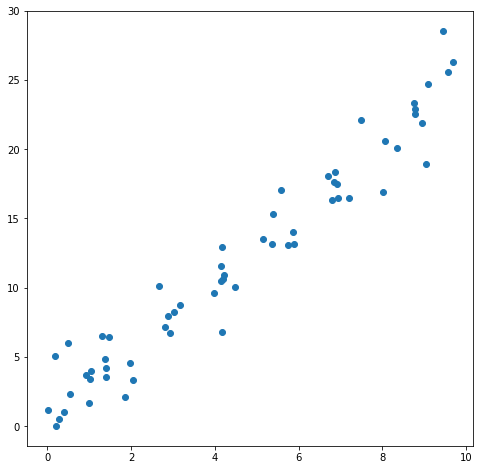

In [3]:
plt.figure(figsize=(8,8))
plt.scatter(X_train,y_train)
plt.show()

Gördüğümüz gibi veri setinde girdi ve çıktı arasında doğrusal bir ilişki var. *x* değeri bir birim arttığında *y* değişkeninin değeri yaklaşık olarak 2.5 birim artıyor. Bir doğrusal bağlanım (linear regression) modeliyle bu ilişkiyle ilgili bilgileri elde edebiliriz. Bu amaçla `LinearRegression()` fonksiyonunu kullanacağız.

In [4]:
#Modeli oluşturalım.
lr = LinearRegression()
#X_train ve y_train değerleriyle modeli eğitelim. 
#.reshape(-1,1) kısmı tek boyutlu değişkenlerle çalıştığımız için gerekli olan bir şey.
lr.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))
print("Kesişim (Intercept): " + str(lr.intercept_))
print("Eğim (Slope): " + str(lr.coef_[0]))

Kesişim (Intercept): [ 0.82241911]
Eğim (Slope): [ 2.43747185]


Modele göre *x* değişkeninin değeri bir birim arttığı zaman *y* değişkeninin değeri 2.44 birim artıyor. Bu da bizim oluşturduğumuz örüntüye (2.5 \* *x*) oldukça yakın bir değer. *x* değeri sıfıra eşit olduğunda ise *y* değeri 0.82 oluyor. Bu bilgiyi test edeceğimiz veri setinde kullanarak sonuçları değerlendirebiliriz. 

Aşağıdaki şekilde mavi noktalar öğrenme verisini, kırmızı noktalar sınama verisini ve yeşil çizgi de elde ettiğimiz modelin çıktısını temsil ediyor.

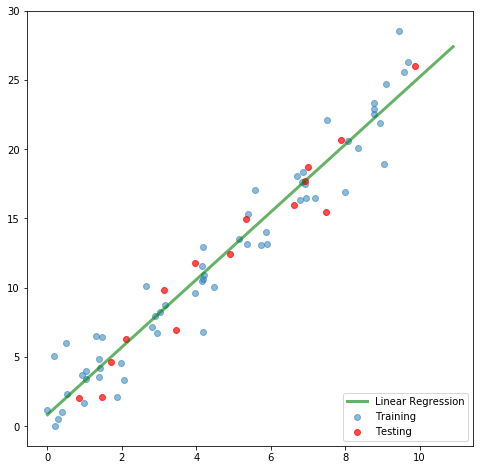

In [5]:
#0 ile 10 arasındaki değerler için modelin sonuçlarını elde edelim.
line_X = np.arange(0,11, 0.1)
line_y = lr.predict(line_X.reshape(-1,1))

plt.figure(figsize=(8,8))
plt.scatter(X_train,y_train, alpha = 0.5, label = 'Training')
plt.scatter(X_test, y_test, c='red', alpha = 0.7, label = 'Testing')
plt.plot(line_X, line_y, c='green', linewidth=3, alpha=0.6, label = 'Linear Regression')
plt.legend(loc = 4)
plt.show()

Gördüğümüz gibi doğrusal bağlanım sınama verisini başarıyla tahmin edebiliyor. 

Overfitting ve Underfitting kavramlarını anlatmak için veride doğrusal olmayan bir ilişki oluşturalım. Kullanacağımız yeni modelde ilişkiyi bu şekilde değiştiriyoruz: $y' = y + 80 y^2 - 4 y^3$. Ben doğrusal olmayan örüntüyü daha belirgin hale getirmek için yeni çıktıları hesaplarken eski çıktı değerlerini kullanmayı tercih ettim.

In [6]:
y_train = y_train +  80* np.power(y_train, 2) - 4 * np.power(y_train, 3)
y_test = X_test +  80* np.power(y_test, 2) - 4 * np.power(y_test, 3) 

Tekrar bir doğrusal bağlanımla modelin öğrenme yeteneğini inceleyelim. Öğrenme yeteneğini daha objektif bir şekilde incelemek için de karesel ortalama hatanın kareköküne (root mean square error, RMSE) bakacağız. Karesel ortalama hata hesaplanırken gözlemin gerçek değeriyle model sonucu elde edilen tahmin arasındaki farkların karelerinin ortalaması alınır ve bu değerin karekökü hesaplanır. Bu şekilde tahmin ettiğimiz değerlerle gerçek gözlemlerin birbirinden ne kadar uzak olduğu bilgisi elde edilir. Kabaca bu değerin düşük olması modelin tahmin yeteneğinin güçlü olduğunu işaret eder diyebiliriz.

Öğrenme verisinde karesel ortalama hata (Root Mean Square Error, RMSE): 5204.60513858
Sınama verisinde karesel ortalama hata (Root Mean Square Error, RMSE): 4694.64592802


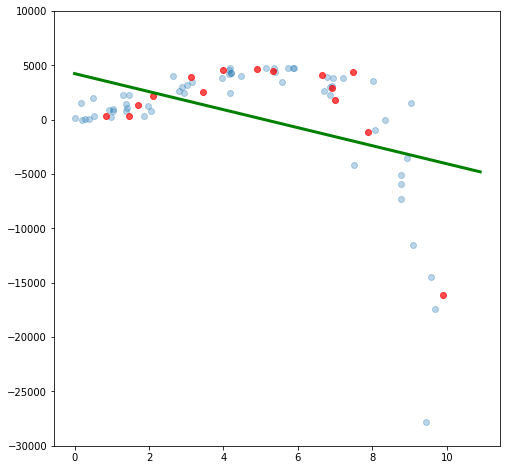

In [7]:
#Modeli oluşturuyoruz.
lr = LinearRegression()
#X ve y değerleriyle modelin öğrenmesini sağlıyoruz.
lr.fit(X_train.reshape(-1,1),y_train)
#Modelin sonucunu görmek için 0 ve 10 aralığında tahmin yapıyoruz.
line_y = lr.predict(line_X.reshape(-1,1))


print("Öğrenme verisinde karesel ortalama hata (Root Mean Square Error, RMSE): " 
      + str(np.sqrt(mean_squared_error(y_train, lr.predict(X_train.reshape(-1,1))))))
print("Sınama verisinde karesel ortalama hata (Root Mean Square Error, RMSE): " 
      + str(np.sqrt(mean_squared_error(y_test, lr.predict(X_test.reshape(-1,1))))))

plt.figure(figsize=(8,8))
plt.scatter(X_train,y_train, alpha = 0.3)
plt.scatter(X_test, y_test, c='red', alpha = 0.7)
plt.plot(line_X, line_y, c='green', linewidth=3)
plt.ylim((-30000, 10000))
plt.show()

Doğrusal bağlanım tek bir değişkenle üçüncü dereceden bir denklemi öğrenemedi. İkinci ve üçüncü dereceden değişkenler eklersek modelin öğrenme yeteneği artacaktır. Bu değişkenleri eklemek için `PolynomialFeatures()` fonksiyonunu kullanıyoruz. Öncelikle ikinci dereceden değişkenler ($x^2$) oluşturalım.

Öğrenme verisinde karesel ortalama hata (Root Mean Square Error, RMSE): 3414.8825409
Sınama verisinde karesel ortalama hata (Root Mean Square Error, RMSE): 2199.33041606


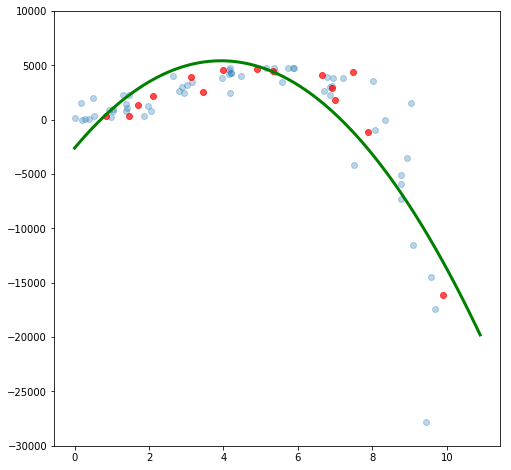

In [8]:
# Degree değerini iki yaparak x ve x^2 değişkenlerini modele ekliyoruz.
pf = PolynomialFeatures(degree=2, include_bias=False)

#Polynomial features fit/transform fonksiyonlarını kullanıyor.
X_train_new = pf.fit_transform(X_train.reshape(-1,1))
X_test_new = pf.transform(X_test.reshape(-1,1))
#0 ve 10 değerleri arasında bağlanım değerlerini çizdirmek için kullanacağız.
line_X_new = pf.transform(line_X.reshape(-1,1))

#Modeli oluşturup öğrenmesini sağlıyoruz.
lr = LinearRegression()
lr.fit(X_train_new,y_train)
print("Öğrenme verisinde karesel ortalama hata (Root Mean Square Error, RMSE): " 
      + str(np.sqrt(mean_squared_error(y_train, lr.predict(X_train_new)))))
print("Sınama verisinde karesel ortalama hata (Root Mean Square Error, RMSE): " 
      + str(np.sqrt(mean_squared_error(y_test, lr.predict(X_test_new)))))

#0 ve 10 değerleri arasında bağlanım değerlerini çizdirmek için kullanacağız.
line_y = lr.predict(line_X_new)


plt.figure(figsize=(8,8))
plt.scatter(X_train,y_train, alpha = 0.3)
plt.scatter(X_test, y_test, c='red', alpha = 0.7)
plt.plot(line_X, line_y, c='green', linewidth=3)
plt.ylim((-30000, 10000))
plt.show()

İkinci dereceden değişkenler sayesinde hem öğrenme hem de sınama veri setinde hatayı azaltmayı başardık. Ancak örüntüyü tam olarak yakalayamadığımız da açık. Şimdi bir de üçüncü dereceden değişkenleri ($x^3$) deneyelim.

Öğrenme verisinde karesel ortalama hata (Root Mean Square Error, RMSE): 2751.46859992
Sınama verisinde karesel ortalama hata (Root Mean Square Error, RMSE): 1238.23998029


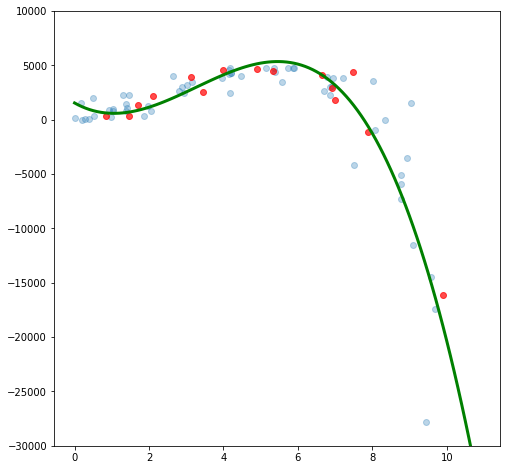

In [9]:
# Degree değerini üç yaparak x, x^2 ve x^3 değişkenlerini modele ekliyoruz.
pf = PolynomialFeatures(degree=3, include_bias=False)

#Polynomial features fit/transform fonksiyonlarını kullanıyor.
X_train_new = pf.fit_transform(X_train.reshape(-1,1))
X_test_new = pf.transform(X_test.reshape(-1,1))
#0 ve 10 değerleri arasında bağlanım değerlerini çizdirmek için kullanacağız.
line_X_new = pf.transform(line_X.reshape(-1,1))

#Modeli oluşturup öğrenmesini sağlıyoruz.
lr = LinearRegression()
lr.fit(X_train_new,y_train)
print("Öğrenme verisinde karesel ortalama hata (Root Mean Square Error, RMSE): " 
      + str(np.sqrt(mean_squared_error(y_train, lr.predict(X_train_new)))))
print("Sınama verisinde karesel ortalama hata (Root Mean Square Error, RMSE): " 
      + str(np.sqrt(mean_squared_error(y_test, lr.predict(X_test_new)))))

#0 ve 10 değerleri arasında bağlanım değerlerini çizdirmek için kullanacağız.
line_y = lr.predict(line_X_new)


plt.figure(figsize=(8,8))
plt.scatter(X_train,y_train, alpha = 0.3)
plt.scatter(X_test, y_test, c='red', alpha = 0.7)
plt.plot(line_X, line_y, c='green', linewidth=3)
plt.ylim((-30000, 10000))
plt.show()

Hatayı azaltmayı başardık. Değişken sayısını arttırırsak daha iyi sonuçlar elde edeceğiz gibi duruyor. Belki de onbeşinci dereceden değişkenleri modele ekleyerek daha iyi bir sonuç elde edebiliriz.

Öğrenme verisinde karesel ortalama hata (Root Mean Square Error, RMSE): 2194.01668969
Sınama verisinde karesel ortalama hata (Root Mean Square Error, RMSE): 13631.7272833


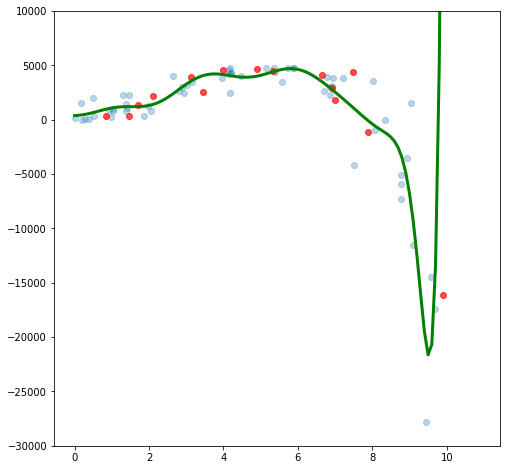

In [10]:
# Degree değerini onbeş yapıyoruz.
pf = PolynomialFeatures(degree=15, include_bias=False)

#Polynomial features fit/transform fonksiyonlarını kullanıyor.
X_train_new = pf.fit_transform(X_train.reshape(-1,1))
X_test_new = pf.transform(X_test.reshape(-1,1))
#0 ve 10 değerleri arasında bağlanım değerlerini çizdirmek için kullanacağız.
line_X_new = pf.transform(line_X.reshape(-1,1))

#Modeli oluşturup öğrenmesini sağlıyoruz.
lr = LinearRegression()
lr.fit(X_train_new,y_train)
print("Öğrenme verisinde karesel ortalama hata (Root Mean Square Error, RMSE): " 
      + str(np.sqrt(mean_squared_error(y_train, lr.predict(X_train_new)))))
print("Sınama verisinde karesel ortalama hata (Root Mean Square Error, RMSE): " 
      + str(np.sqrt(mean_squared_error(y_test, lr.predict(X_test_new)))))

#0 ve 10 değerleri arasında bağlanım değerlerini çizdirmek için kullanacağız.
line_y = lr.predict(line_X_new)


plt.figure(figsize=(8,8))
plt.scatter(X_train,y_train, alpha = 0.3)
plt.scatter(X_test, y_test, c='red', alpha = 0.7)
plt.plot(line_X, line_y, c='green', linewidth=3)
plt.ylim((-30000, 10000))
plt.show()

Şekilde gördüğümüz gibi model veriyi çok başarılı bir şekilde öğrenmeyi başardı. Öğrenme verisindeki hata da düşmüş durumda. Ama aynı şeyi sınama verisi için söyleyemeyiz. Sınama verisinde hatanın tam tersine arttığını görüyoruz. Şimdi `PolynomialFeatures` altındaki `degree` (derece) değişkeninin 1'den 15'e çıkararak her bir değer için hataların durumuna bakalım. 

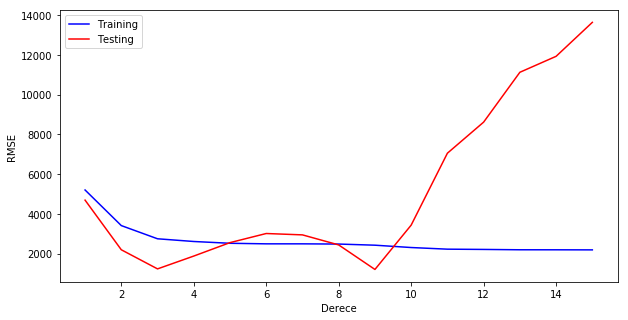

In [11]:
#Karesel Ortalama Hata değerleri, öğrenme ve sınama veri setleri için
score_train = np.zeros(16)
score_test = np.zeros(16)

#1 ile 15 arasında dereceyi değiştirerek sonuçları tutuyoruz.
for i in range(1,16):
    pf = PolynomialFeatures(degree=i, include_bias=False)
    X_train_new = pf.fit_transform(X_train.reshape(-1,1))
    X_test_new = pf.transform(X_test.reshape(-1,1))
    lr = LinearRegression()
    lr.fit(X_train_new,y_train)
    score_train[i] = np.sqrt(mean_squared_error(y_train, lr.predict(X_train_new)))
    score_test[i] = np.sqrt(mean_squared_error(y_test, lr.predict(X_test_new)))

#Sonuçları daha güzel çizmek için ilk değeri boş bırakıyoruz
score_test[0] = np.nan
score_train[0] = np.nan

plt.figure(figsize=(10,5))
plt.plot(score_train, color = 'blue', label = 'Training')
plt.plot(score_test, color = 'red', label = 'Testing')
plt.xlabel('Derece')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Gördüğümüz gibi `PolynomialFeatures` altındaki derece sayısını arttırdıkça öğrenme veri setini daha iyi öğreniyoruz. Ancak öğrendiğimiz örüntüler sınama verisinde işimize yaramıyor. Üçüncü dereceden itibaren hata artıyor. Dokuzuncu derecedeki düşüş de muhtemelen bir örüntüden çok şansla ilgili.

Overfitting ve Underfitting sınıflandırma problemlerinde de karşımıza çıkabilecek bir durum. Bunu da yine yapay bir veri seti üzerinde inceleyelim. Bu amaçla `scikit-learn` altındaki `make_classification()` fonksiyonunu kullanacağız.

Öğrenme algoritması olarak `GradientBoostingClassifier()` yöntemini seçtik. Bu yöntem iterasyonlarla ilerleyen bir yöntem. Her iterasyonda bir önceki iterasyonun hatalarını düzeltmeyi amaçlıyor. İterasyon sayısının öğrenme yeteneğindeki etkisine bakalım. Değerlendirme için isabetlilik (accuracy) değerine bakacağız. Bu da modelin yaptığı doğru tahminin yüzdesine denk geliyor.

In [12]:
# 3000 örnek ve 100 öznitelikten oluşan bir veri seti oluşturuyoruz. 
# flip_y değeri sayesinde etiketlerin %25'inin değerini değiştiriyoruz. Bu sayede daha zor bir problem elde edeceğiz.
X,y = make_classification(n_samples = 3000, n_features=100, flip_y = 0.25, random_state= 100 )

#Veriyi öğrenme ve sınama veri setlerine ayırıyoruz.
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.80, random_state = 100)

#Öğrenme için iteratif bir yöntem olan GradientBoosting'i kullanacağız.
#İterasyon sayısını az tuttuğumuzda yeterince öğrenememe, fazla tuttuğumuzda ise ezberleme durumu ortaya çıkabilir.
#200 iterasyon kullanarak modeli ouşturup öğrenmesini sağlayalım.
#Modelin performansını değerlendirmek için doğru tahmin yüzdesini (accuracy) kullanacağız.
clf = GradientBoostingClassifier(n_estimators = 200, random_state= 0 )
clf.fit(X_train, y_train)

print('Öğrenme versinde isabetlilik: ' + str(accuracy_score(clf.predict(X_train),y_train)))
print('Sınama verisinde isabetlilik: ' + str(accuracy_score(clf.predict(X_test),y_test)))

C:\Users\byuceoglu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Öğrenme versinde isabetlilik: 0.935
Sınama verisinde isabetlilik: 0.806666666667


Gördüğümüz gibi öğrenme verisinde isabetlilik gayet yüksekken, sınama verisinde bu değer daha düşük. Bu normal bir durum olsa da aradaki fark aşırı uyuma işaret ediyor olabilir. Şimdi bir de her iterasyonda ne olduğunu inceleyelim.

Enbüyük isabetlilik değeri: 0.816666666667
Enbüyük isabetlilik değerinin elde edildiği iterasyon: 46


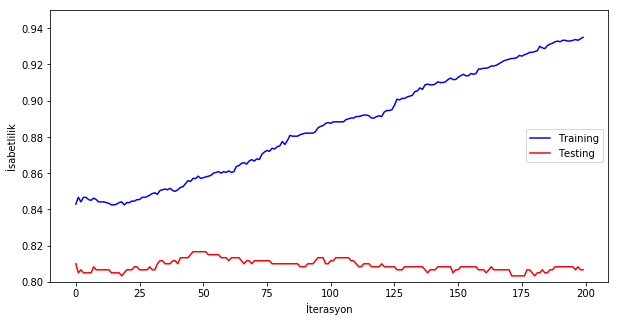

In [13]:
# İsabetlilik değerlerini içeren diziler
score_test = np.zeros((200,), dtype=np.float64)
score_train = np.zeros((200,), dtype=np.float64)

#İsabetlilik değerlerini dolduruyoruz. Staged_predict fonksiyonu her iterasyonun sonuçlarını döndürmek için kullanılıyor.
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    score_test[i] = accuracy_score(y_test, y_pred)

for i, y_pred in enumerate(clf.staged_predict(X_train)):
    score_train[i] = accuracy_score(y_train, y_pred)


print('Enbüyük isabetlilik değeri: ' + str(score_test.max()) )
print('Enbüyük isabetlilik değerinin elde edildiği iterasyon: ' + str(score_test.argmax()) )

plt.figure(figsize = (10,5))
plt.plot(score_train, label='Training', c= 'blue')
plt.plot(score_test, label='Testing', c = 'red')
plt.ylim((0.8,0.95))
plt.xlabel('İterasyon')
plt.ylabel('İsabetlilik')
plt.legend(loc=5)
plt.show()

Gördüğümüz gibi öğrenme verisinde hatamız gitgide düşüyor. Muhtemelen iterasyon sayısını arttırırsak öğrenme verisini tamamen doğru bir şekilde öğrenebileceğiz. gerçi buna öğrenmek yerine ezberlemek demek daha doğru. Sınama verisinde en iyi isabetliliği 46. iterasyonda elde ediyoruz. Bu iterasyondan önce ve sonra isabetlilik değerleri daha düşük. Öncesinde veriyi öğrendiğimizi (Underfitting) sonrasında ise ezberlediğimizi (Overfitting) söyleyebiliriz. Bu örnekte fark küçük de olsa gerçek uygulamalarda bu dengeyi başarılı bir şekilde tutturmak projenizin başarısını belirleyen faktör olabilir.

Bu Veri Defteri'ni [github](https://github.com/sibirbil/VeriDefteri) dizininde bulabilirsiniz. 